In [2]:
#EXAMPLE 1
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

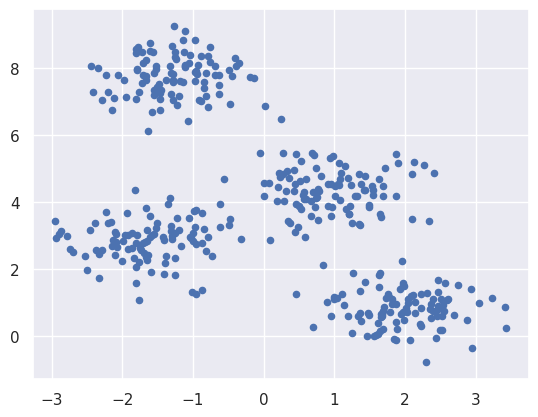

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

In [7]:
#make an object of KMeans along with providing number of clusters, train the model and do the prediction as follows:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

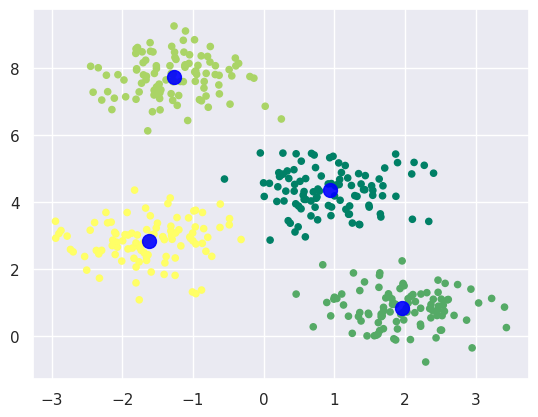

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

In [9]:
#EXAMPLE 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape


(1797, 64)

In [11]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

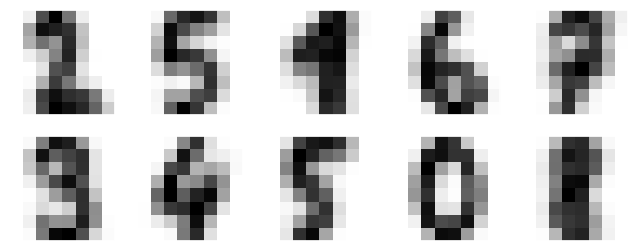

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [14]:
from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725